# Projeto de Composição Boxplot e Histograma com Seaborn

In [1]:
import pandas as pd

DADOS = "dados/precos_fone_ouvido.csv"

df = pd.read_csv(DADOS)

df.head()

,Price
0,189.0
1,195.0
2,199.0
3,189.0
4,197.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


In [ ]:
with pd.option_context("float_format", "{:.2f}".format):
    display(df.describe())

,Price
count,100.00
mean,190.77
std,15.62
min,149.00
25%,179.00
50%,189.00
75%,199.00
max,239.00


In [ ]:
df["Price"].value_counts()

Price
199.0    21
189.0    19
179.0    13
169.0     7
195.0     6
209.0     6
205.0     4
159.0     3
170.0     2
215.0     2
185.0     2
229.0     2
175.0     2
190.0     1
206.0     1
219.0     1
149.0     1
202.0     1
196.0     1
165.0     1
197.0     1
182.0     1
239.0     1
183.0     1
Name: count, dtype: int64

In [2]:
df["Price"].value_counts().sort_index()

Price
149.0     1
159.0     3
165.0     1
169.0     7
170.0     2
175.0     2
179.0    13
182.0     1
183.0     1
185.0     2
189.0    19
190.0     1
195.0     6
196.0     1
197.0     1
199.0    21
202.0     1
205.0     4
206.0     1
209.0     6
215.0     2
219.0     1
229.0     2
239.0     1
Name: count, dtype: int64

In [ ]:
df["Price"].value_counts(bins=10).sort_index()

Price
(148.909, 158.0]     1
(158.0, 167.0]       4
(167.0, 176.0]      11
(176.0, 185.0]      17
(185.0, 194.0]      20
(194.0, 203.0]      30
(203.0, 212.0]      11
(212.0, 221.0]       3
(221.0, 230.0]       2
(230.0, 239.0]       1
Name: count, dtype: int64

## Histograma

Um histograma é uma representação visual da distribuição de dados quantitativos. Para construir um histograma, o primeiro passo é agrupar o intervalo de valores - dividir todo o intervalo de valores em uma série de intervalos - e depois contar quantos valores caem em cada intervalo. Os intervalos (*bins*, em inglês) são geralmente especificados como intervalos consecutivos e não sobrepostos de uma variável. Os bins devem ser adjacentes e geralmente (mas não são obrigados a ser) de tamanho igual.

Os histogramas dão uma ideia aproximada da densidade da distribuição subjacente dos dados e muitas vezes para a estimativa de densidade, ou seja estimar a probabilidade da variável subjacente.

*Kernel Density Estimation* (KDE) busca visualizar de forma mais suave uma variável contínua quando comparado a um histograma.

<Axes: xlabel='Price', ylabel='Count'>

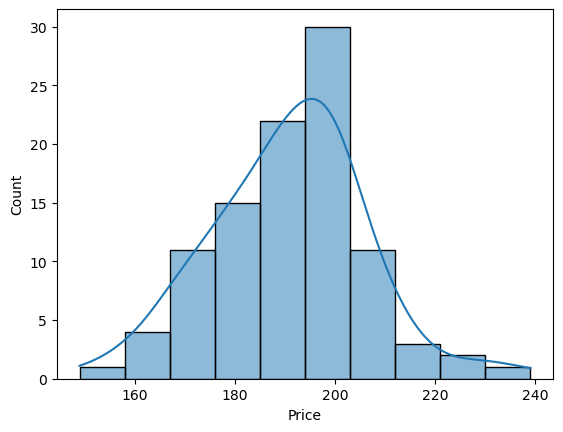

In [ ]:
import seaborn as sns

sns.histplot(x="Price", data=df, bins=10, kde=True)

In [ ]:
with pd.option_context("float_format", "{:.2f}".format):
    display(df.describe())

,Price
count,100.00
mean,190.77
std,15.62
min,149.00
25%,179.00
50%,189.00
75%,199.00
max,239.00


## Boxplot

Um boxplot é um método para demonstrar graficamente a localidade (tendência central), dispersão e assimetria de grupos de dados numéricos através de seus quartis. 

Além da caixa em um boxplot, pode haver linhas (chamadas de *whiskers*, bigodes em portuês) que se estendem da caixa indicando variabilidade (distância entre os valores) fora dos quartis superiores e inferiores. Outliers que diferem significativamente do restante do conjunto de dados podem ser plotados como pontos individuais além dos bigodes no boxplot. Boxplots são não-paramétricos: eles exibem variação em amostras de uma população estatística sem fazer nenhuma suposição sobre a distribuição estatística subjacente. Os espaçamentos em cada subseção do boxplot indicam o grau de dispersão e assimetria dos dados. Boxplots podem ser desenhados horizontalmente ou verticalmente.

Um boxplot é uma maneira padronizada de exibir o conjunto de dados com base no resumo dos cinco números: o mínimo, o máximo, a mediana da amostra e o primeiro e terceiro quartis.

- Mínimo (Q0 ou 0º percentil): o ponto de dados mais baixo no conjunto de dados, excluindo quaisquer outliers
- Máximo (Q4 ou 100º percentil): o ponto de dados mais alto no conjunto de dados, excluindo quaisquer outliers
- Mediana (Q2 ou 50º percentil): o valor do meio no conjunto de dados
- Primeiro quartil (Q1 ou 25º percentil): também conhecido como quartil inferior, é a mediana da metade inferior do conjunto de dados.
- Terceiro quartil (Q3 ou 75º percentil): também conhecido como quartil superior, é a mediana da metade superior do conjunto de dados.

Além dos valores mínimo e máximo usados para construir um boxplot, outro elemento importante que também pode ser empregado para obter um boxplot é a amplitude interquartil (IQR), a distância entre os quartis superior e inferior.

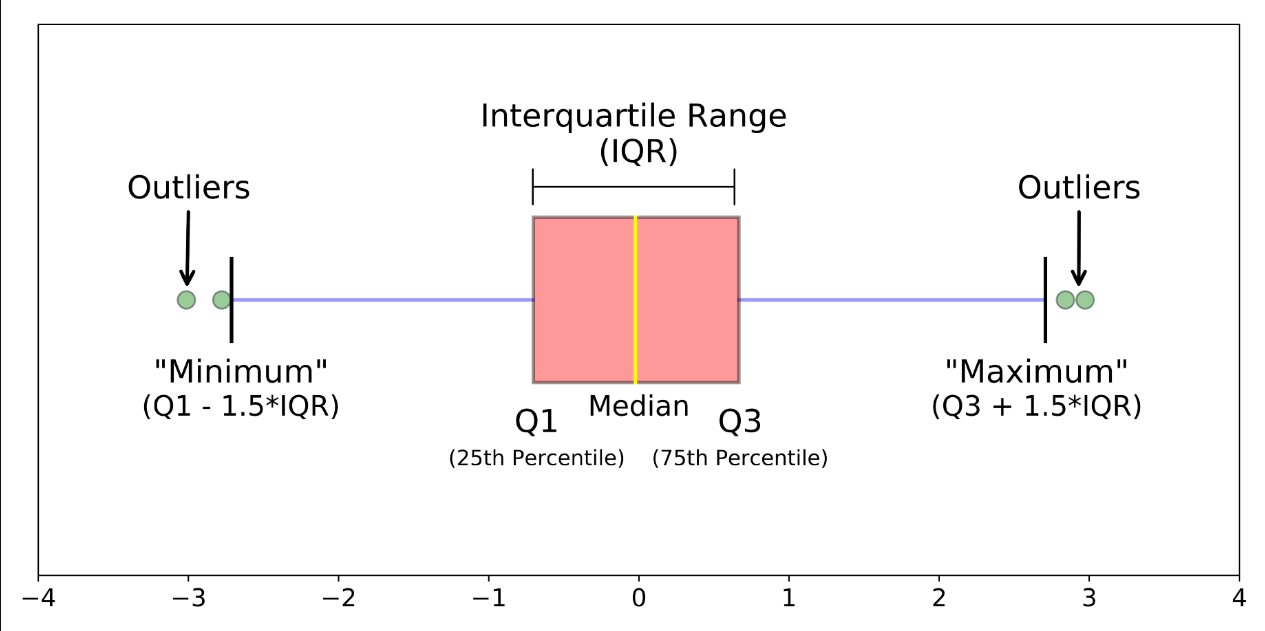

<Axes: xlabel='Price'>

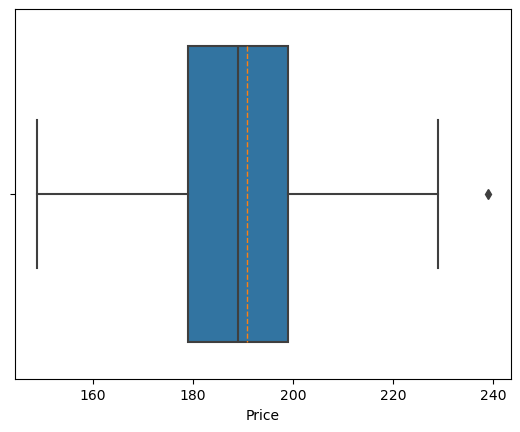

In [ ]:
sns.boxplot(
    x="Price",
    data=df,
    showmeans=True,
    meanline=True,
    meanprops={"color": "C1", "linestyle": "--", "linewidth": 1},
)

<Axes: xlabel='Price'>

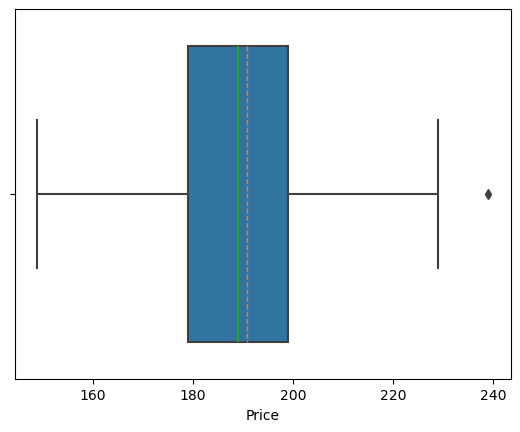

In [ ]:
# bônus para quem baixou o material - mudando a cor da linha da mediana
sns.boxplot(
    x="Price",
    data=df,
    showmeans=True,
    meanline=True,
    meanprops={"color": "C1", "linestyle": "--", "linewidth": 1},
    medianprops={"color": "C2", "linestyle": "-", "linewidth": 1.5},
)

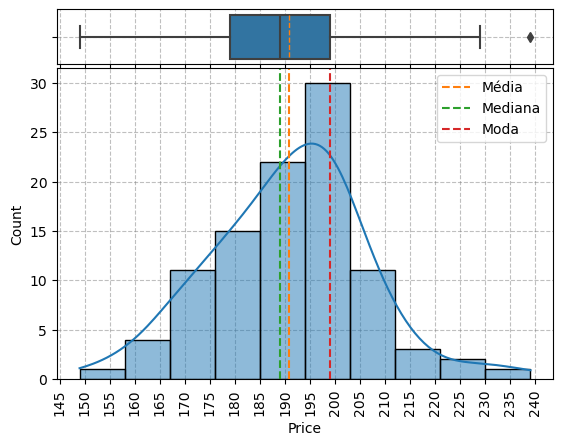

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    gridspec_kw={"height_ratios": (0.15, 0.85), "hspace": 0.02},
)

sns.boxplot(
    x="Price",
    data=df,
    ax=ax1,
    showmeans=True,
    meanline=True,
    meanprops={"color": "C1", "linestyle": "--", "linewidth": 1},
)
sns.histplot(x="Price", data=df, bins=10, kde=True, ax=ax2)

ax2.xaxis.set_major_locator(mtick.MultipleLocator(base=5.0))
ax2.tick_params(axis="x", rotation=90)

for ax in (ax1, ax2):
    ax.grid(True, linestyle="--", color="gray", alpha=0.5)
    ax.set_axisbelow(True)

ax2.axvline(df["Price"].mean(), color="C1", linestyle="--", label="Média")
ax2.axvline(df["Price"].median(), color="C2", linestyle="--", label="Mediana")
ax2.axvline(df["Price"].mode()[0], color="C3", linestyle="--", label="Moda")

ax2.legend()

plt.show()

In [ ]:
def box_hist_plot(dados, coluna, bins=10):
    
    fig, (ax1, ax2) = plt.subplots(
        2, 1, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85), "hspace": 0.02}
    )

    sns.boxplot(
        x=coluna,
        data=dados,
        ax=ax1,
        showmeans=True,
        meanline=True,
        meanprops={"color": "C1", "linestyle": "--", "linewidth": 1},
    )
    sns.histplot(x=coluna, data=dados, bins=bins, kde=True, ax=ax2)

    ax2.xaxis.set_major_locator(mtick.MultipleLocator(base=5.0))
    ax2.tick_params(axis="x", rotation=90)

    for ax in (ax1, ax2):
        ax.grid(True, linestyle="--", color="gray", alpha=0.5)
        ax.set_axisbelow(True)

    ax2.axvline(dados[coluna].mean(), color="C1", linestyle="--", label="Média")
    ax2.axvline(dados[coluna].median(), color="C2", linestyle="--", label="Mediana")
    ax2.axvline(dados[coluna].mode()[0], color="C3", linestyle="--", label="Moda")

    ax2.legend()

    plt.show()

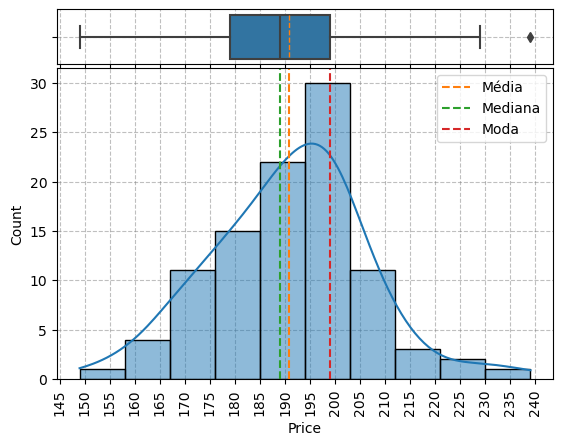

In [ ]:
box_hist_plot(df, "Price")